In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [23]:
def sol_svd(A,b):
    u, s, vt = np.linalg.svd(A, full_matrices=True)
    r = LA.matrix_rank(A)
    U = u[:,:r]
    Vt = vt[:r,:]
    S = s[:r]
    sigmaI = np.diag(1/S)
    temp1 = np.matmul(U, np.matmul(sigmaI, Vt))
    temp2 = np.transpose(temp1)
    x = np.matmul(temp2, b)
    return x

In [24]:
def gen_A_input(mat,k):
    N = np.shape(mat)[0]
    M = (2*k+3)*k
    A = np.zeros((N,M))
#    A[:,0] = mat[:,0]
    if (k>=1):
        for i in range(k):
            A[2*i+2:,2*i:2+2*i] = mat[:-(2*i+2),:]
        si = 0
        for i in range(2*k):
            si = si + i
            for j in range(i+1):
                A[:,2*k+si+j] = A[:,i]*A[:,j]
    mean = A.mean(axis=0)
    std = np.std(A, axis=0)
    A = (A-mean)/std        # Normalize data
    A1 = np.ones((N,M+1))
    A1[:,:-1] = A           # Adding the constant term
    return [A1, mean, std]  # mean and std to normalize to second matrix

In [25]:
def gen_A_output(mat,k,mean,std):
    N = np.shape(mat)[0]
    M = (2*k+3)*k
    A = np.zeros((N,M))
#    A[:,0] = mat[:,0]
    if (k>=1):
        for i in range(k):
            A[i+1:,2*i:2+2*i] = mat[:-(i+1),:]
        si = 0
        for i in range(2*k):
            si = si + i
            for j in range(i+1):
                A[:,2*k+si+j] = A[:,i]*A[:,j]
    A = (A-mean)/std
    A1 = np.ones((N,M+1))
    A1[:,:-1] = A
    return A1

In [26]:
def gre(x,val):
    n = np.size(x)
    for i in range(n):
        if (np.absolute(x[i])<=val):
            x[i] = 0
    return x

In [119]:
f = open('data_60ps', "r")
mat1 =  np.genfromtxt(f)
mat_input = mat1[:,1:]

In [120]:
k = 2   # number of time steps
[A, mean, std] = gen_A_input(mat_input,k)

In [136]:
b1 = mat_input[:,1]
x1 = sol_svd(A,b1)
x2 = gre(x1,0.05)  # Avoiding over-fitting 
n = np.size(x2)
x = np.reshape(x1, (n, 1))

In [137]:
f2 = open('data_120ps', "r")
mat2 =  np.genfromtxt(f2)
mat_output = mat2[:,1:]
A_output = gen_A_output(mat_output,k,mean,std)

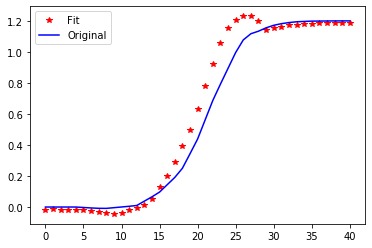

In [138]:
b = np.reshape(mat_output[:,1],(41,1))
y = np.matmul(A_output,x)
m = np.mean(b)
R = np.matmul(np.transpose(y-b), y-b)/np.matmul(np.transpose(b), b)
plt.plot(y,'r*',label='Fit')
plt.plot(b,'b',label='Original')
plt.legend()
plt.show()

In [139]:
R

array([[0.01773751]])

In [140]:
x1

array([-0.9898929 ,  1.12863132,  0.96635986, -0.32061652,  0.95679271,
        0.13572009,  0.32644515, -0.81422653, -0.27782802, -0.09585753,
        0.        , -1.81444879,  0.12056683,  1.20803244,  0.58539584])